In [1]:
import math
import numpy as np
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import cross_val_score
import seaborn as sns
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score

from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import BorderlineSMOTE
from numpy import where
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_score, f1_score, recall_score
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectFromModel

In [2]:
df_showcase = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/00383/risk_factors_cervical_cancer.csv',)
df_showcase

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,18,4.0,15.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
1,15,1.0,14.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
2,34,1.0,?,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
3,52,5.0,16.0,4.0,1.0,37.0,37.0,1.0,3.0,0.0,...,?,?,1,0,1,0,0,0,0,0
4,46,3.0,21.0,4.0,0.0,0.0,0.0,1.0,15.0,0.0,...,?,?,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
853,34,3.0,18.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
854,32,2.0,19.0,1.0,0.0,0.0,0.0,1.0,8.0,0.0,...,?,?,0,0,0,0,0,0,0,0
855,25,2.0,17.0,0.0,0.0,0.0,0.0,1.0,0.08,0.0,...,?,?,0,0,0,0,0,0,1,0
856,33,2.0,24.0,2.0,0.0,0.0,0.0,1.0,0.08,0.0,...,?,?,0,0,0,0,0,0,0,0


In [3]:
df = pd.read_csv('Clean Data.csv')
df1 = pd.DataFrame(df)

samples,attributes = df1.shape
print('\nNo of Samples: {0} and No of Features: {1}'.format(samples,attributes))


No of Samples: 856 and No of Features: 26


In [4]:
df1.head(10)

,Unnamed: 0,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),...,STDs:HIV,STDs: Number of diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,0,18,4.0,15.0,1.0,0.0,0.00,0.0,0.0,0.0,...,0.0,0,0,0,0,0,0,0,0,0
1,1,15,1.0,14.0,1.0,0.0,0.00,0.0,0.0,0.0,...,0.0,0,0,0,0,0,0,0,0,0
2,2,34,1.0,17.0,1.0,0.0,0.00,0.0,0.0,0.0,...,0.0,0,0,0,0,0,0,0,0,0
3,3,52,5.0,16.0,4.0,1.0,37.00,37.0,1.0,3.0,...,0.0,0,1,0,1,0,0,0,0,0
4,4,46,3.0,21.0,4.0,0.0,0.00,0.0,1.0,15.0,...,0.0,0,0,0,0,0,0,0,0,0
5,5,42,3.0,23.0,2.0,0.0,0.00,0.0,0.0,0.0,...,0.0,0,0,0,0,0,0,0,0,0
6,6,51,3.0,17.0,6.0,1.0,34.00,3.4,0.0,0.0,...,0.0,0,0,0,0,0,1,1,0,1
7,7,26,1.0,26.0,3.0,0.0,0.00,0.0,1.0,2.0,...,0.0,0,0,0,0,0,0,0,0,0
8,8,45,1.0,20.0,5.0,0.0,0.00,0.0,0.0,0.0,...,0.0,0,1,0,1,1,0,0,0,0
9,9,44,3.0,15.0,2.0,1.0,1.27,2.8,0.0,0.0,...,0.0,0,0,0,0,0,0,0,0,0


In [5]:
df1.drop('Unnamed: 0',inplace=True,axis=1)

C:\Users\ngoa\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Hinselmann', ylabel='count'>

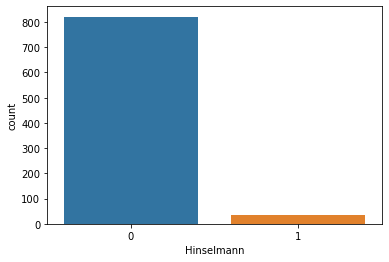

In [6]:
sns.countplot(df1['Hinselmann'])


In [7]:
X=df1.drop(['Hinselmann','Schiller','Citology','Biopsy'],axis=1)
Y1=df1['Hinselmann']

In [8]:
col_names = pd.concat([X, Y1], axis=1).columns.tolist()
# transform the dataset
oversample = BorderlineSMOTE()
X, Y1 = oversample.fit_resample(X, Y1)
print(type(X))

df_= pd.concat([X, Y1], axis=1)
# smote_array = np.concatenate([X, Y1.reshape(-1, 1)], axis=1)
# df_ = pd.DataFrame(smote_array,columns=col_names)
# # clf = ExtraTreesClassifier(n_estimators=50)
# clf = clf.fit(X, Y1)

# features = ['Age', 'Number of sexual partners', 'First sexual intercourse',
#     'Num of pregnancies', 'Smokes', 'Smokes (years)', 'Smokes (packs/year)',
#     'Hormonal Contraceptives', 'Hormonal Contraceptives (years)', 'IUD',
#     'IUD (years)', 'STDs', 'STDs (number)', 'STDs:condylomatosis',
#     'STDs:syphilis', 'STDs:HIV', 'STDs: Number of diagnosis', 'Dx:Cancer',
#     'Dx:CIN', 'Dx:HPV', 'Dx']

# feat_importances = pd.Series(clf.feature_importances_, index=features)

# print(feat_importances.sort_values())

<class 'pandas.core.frame.DataFrame'>


In [9]:
df_.shape

(1642, 22)

In [10]:
df_.head(10)

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs (number),STDs:condylomatosis,STDs:syphilis,STDs:HIV,STDs: Number of diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann
0,18,4.0,15.0,1.0,0.0,0.00,0.0,0.0,0.0,0.0,...,0,0.0,0.0,0.0,0,0,0,0,0,0
1,15,1.0,14.0,1.0,0.0,0.00,0.0,0.0,0.0,0.0,...,0,0.0,0.0,0.0,0,0,0,0,0,0
2,34,1.0,17.0,1.0,0.0,0.00,0.0,0.0,0.0,0.0,...,0,0.0,0.0,0.0,0,0,0,0,0,0
3,52,5.0,16.0,4.0,1.0,37.00,37.0,1.0,3.0,0.0,...,0,0.0,0.0,0.0,0,1,0,1,0,0
4,46,3.0,21.0,4.0,0.0,0.00,0.0,1.0,15.0,0.0,...,0,0.0,0.0,0.0,0,0,0,0,0,0
5,42,3.0,23.0,2.0,0.0,0.00,0.0,0.0,0.0,0.0,...,0,0.0,0.0,0.0,0,0,0,0,0,0
6,51,3.0,17.0,6.0,1.0,34.00,3.4,0.0,0.0,1.0,...,0,0.0,0.0,0.0,0,0,0,0,0,1
7,26,1.0,26.0,3.0,0.0,0.00,0.0,1.0,2.0,1.0,...,0,0.0,0.0,0.0,0,0,0,0,0,0
8,45,1.0,20.0,5.0,0.0,0.00,0.0,0.0,0.0,0.0,...,0,0.0,0.0,0.0,0,1,0,1,1,0
9,44,3.0,15.0,2.0,1.0,1.27,2.8,0.0,0.0,0.0,...,0,0.0,0.0,0.0,0,0,0,0,0,0


In [11]:
X.shape

(1642, 21)

In [12]:
Y1.shape

(1642,)

In [13]:
df_= df_.sample(frac=1,random_state=1).reset_index()

In [14]:
df_.head(10)

,index,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),...,STDs (number),STDs:condylomatosis,STDs:syphilis,STDs:HIV,STDs: Number of diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann
0,161,28,2.000000,18.000000,2.000000,0.000000,0.000000,0.000000,1.000000,6.000000,...,0,0.0,0.0,0.0,0,0,0,0,0,0
1,1016,17,1.889892,15.220215,1.889892,0.889892,0.444946,0.044495,0.889892,0.293665,...,0,0.0,0.0,0.0,0,0,0,0,0,1
2,1498,18,2.000000,15.000000,2.602517,0.000000,0.000000,0.000000,0.801259,0.464730,...,0,0.0,0.0,0.0,0,0,0,0,0,1
3,558,38,1.000000,24.000000,3.000000,0.000000,0.000000,0.000000,1.000000,6.500000,...,0,0.0,0.0,0.0,0,0,0,0,0,0
4,799,35,3.000000,17.000000,3.000000,1.000000,20.000000,2.000000,1.000000,2.000000,...,0,0.0,0.0,0.0,0,0,0,0,0,0
5,1566,38,1.000000,19.657038,2.114321,0.000000,0.000000,0.000000,1.000000,13.742471,...,0,0.0,0.0,0.0,0,0,0,0,0,1
6,1066,21,2.848187,14.227720,2.924093,0.000000,0.000000,0.000000,1.000000,0.962047,...,0,0.0,0.0,0.0,0,0,0,0,0,1
7,1080,33,2.626922,18.253843,3.000000,0.000000,0.000000,0.000000,1.000000,0.473386,...,0,0.0,0.0,0.0,0,0,0,0,0,1
8,592,20,3.000000,18.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,0,0.0,0.0,0.0,0,0,0,0,0,0
9,1013,34,2.212803,18.638409,6.000000,0.212803,1.489622,0.340485,1.000000,0.840398,...,0,0.0,0.0,0.0,0,0,0,0,0,1


In [15]:
X=df_.drop(['Hinselmann'],axis=1)
Y1=df_['Hinselmann']

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
X_train, X_test, Y1_train, Y1_test = train_test_split(X, 
                                                  Y1, 
                                                  test_size=0.2, 
                                                  random_state=123)

In [18]:
print(f"Shape of Y1_train is {Y1_train.shape}")
print(f"Shape of X_train is {X_train.shape}")

Shape of Y1_train is (1313,)
Shape of X_train is (1313, 22)


In [19]:
opt = tf.keras.optimizers.Adam(learning_rate=0.001)
# tf.random.set_seed(123)
neuralNetworkModel = tf.keras.Sequential([
    tf.keras.layers.Dense(512, activation='relu'),
    
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dropout(0.1),
    tf.keras.layers.Dense(1, activation='sigmoid')])

neuralNetworkModel.compile(optimizer=opt,
                           loss='binary_crossentropy',
                          metrics=['accuracy',tf.keras.metrics.Precision(name='precision')])
trainingResults = neuralNetworkModel.fit(X_train,Y1_train,validation_data=(X_test,Y1_test),batch_size=30,epochs=50,shuffle=True)

Epoch 1/50
44/44 [==============================] - 1s 11ms/step - loss: 2.5149 - accuracy: 0.5758 - precision: 0.5585 - val_loss: 0.5276 - val_accuracy: 0.6261 - val_precision: 0.5735
Epoch 2/50
44/44 [==============================] - 0s 3ms/step - loss: 0.7076 - accuracy: 0.6855 - precision: 0.6506 - val_loss: 0.3741 - val_accuracy: 0.8480 - val_precision: 0.7969
Epoch 3/50
44/44 [==============================] - 0s 3ms/step - loss: 0.4432 - accuracy: 0.7913 - precision: 0.7564 - val_loss: 0.3186 - val_accuracy: 0.8511 - val_precision: 0.8010
Epoch 4/50
44/44 [==============================] - 0s 4ms/step - loss: 0.4282 - accuracy: 0.8065 - precision: 0.7749 - val_loss: 0.3456 - val_accuracy: 0.8389 - val_precision: 0.7817
Epoch 5/50
44/44 [==============================] - 0s 4ms/step - loss: 0.3718 - accuracy: 0.8492 - precision: 0.8174 - val_loss: 0.3155 - val_accuracy: 0.8328 - val_precision: 0.7739
Epoch 6/50
44/44 [==============================] - 0s 4ms/step - loss: 0.2684 

44/44 [==============================] - 0s 4ms/step - loss: 0.1845 - accuracy: 0.9276 - precision: 0.9232 - val_loss: 0.2162 - val_accuracy: 0.9392 - val_precision: 0.9737
Epoch 46/50
44/44 [==============================] - 0s 4ms/step - loss: 0.2130 - accuracy: 0.9200 - precision: 0.9095 - val_loss: 0.2930 - val_accuracy: 0.8936 - val_precision: 0.9924
Epoch 47/50
44/44 [==============================] - 0s 4ms/step - loss: 0.1900 - accuracy: 0.9360 - precision: 0.9361 - val_loss: 0.2084 - val_accuracy: 0.9362 - val_precision: 0.9735
Epoch 48/50
44/44 [==============================] - 0s 4ms/step - loss: 0.1633 - accuracy: 0.9414 - precision: 0.9462 - val_loss: 0.2617 - val_accuracy: 0.9331 - val_precision: 0.9610
Epoch 49/50
44/44 [==============================] - 0s 4ms/step - loss: 0.1700 - accuracy: 0.9353 - precision: 0.9414 - val_loss: 0.2217 - val_accuracy: 0.9362 - val_precision: 0.9799
Epoch 50/50
44/44 [==============================] - 0s 3ms/step - loss: 0.1553 - accur

In [20]:
neuralNetworkModel.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               11776     
                                                                 
 dense_1 (Dense)             (None, 256)               131328    
                                                                 
 dense_2 (Dense)             (None, 128)               32896     
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_3 (Dense)             (None, 64)                8256      
                                                                 
 dense_4 (Dense)             (None, 32)                2080      
                                                                 
 dropout_1 (Dropout)         (None, 32)                0

In [21]:
trainingAccuracy = neuralNetworkModel.evaluate(X_train,Y1_train,verbose=0)
testingAccuracy = neuralNetworkModel.evaluate(X_test,Y1_test,verbose=0)
print('\n\n')
print('\nTraining Accuracy: ',trainingAccuracy[1])
print('\nTest Accuracy: ',testingAccuracy[1])





Training Accuracy:  0.9405940771102905

Test Accuracy:  0.93313068151474
